<a href="https://colab.research.google.com/github/marinandres/Episode-4/blob/main/Episode_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**How Computers Vision Works? – Let’s Harvest Some Tomatoes!**

---

Here on epiosode 4 we are going to explore how images are decoded pixel by pixel. Using a Kaggle dataset featuring fresh and rotten tomatoes, our goal is to teach how computers distinguish between them. I called "The Pixel Explanation," revealing how algorithms analyze minute details to identify data from images.

**Installing Dependencies**

In [ ]:
import pandas as pd
import numpy as np
import os
import cv2
import imghdr
import tensorflow as tf
from sklearn import svm
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, f1_score
import matplotlib.pyplot as plt

**Load Data**

To facilitate image classification of tomatoes using Support Vector Machines (SVMs), we begin by accessing our image dataset directly from a designated folder using Python's os module. Each image filename contains descriptive tags indicating the quality of the tomato, such as 'bad', 'good', 'very-bad', or 'very-good'. Our initial task involves creating corresponding labels for each image based on these tags.

In [ ]:
def extract_label(image_name):
    label = None
    parts = image_name.split('-')

    if len(parts) > 1:
        first_word = parts[0].lower()
        if first_word == "very":
          if parts[1] == "good":
            label = "very-good"
          else:
            label = "very-bad"
        elif(first_word=="bad"):
            label = parts[0]
        elif(first_word=="good"):
            label = parts[0]
        else:
            pass

    return label

def load_and_preprocess_images(images_path):
    features = []
    labels = []
    classifier = {'bad': 0, 'good': 1, 'very-bad': 2, 'very-good': 3}
    for img in os.listdir(images_path):
        image = cv2.imread(os.path.join(images_path, img))
        label_name = extract_label(img)

        if label_name not in classifier:
            continue

        class_label = classifier[label_name]

        image = cv2.resize(image, (256, 256))
        image = image.flatten()/255.0

        features.append(image)
        labels.append(class_label)

    return np.array(features), np.array(labels)

# Set the path to your image data
directory = 'images_test'

# Load and preprocess images and labels
X, y = load_and_preprocess_images(directory)

To ensure consistency in image dimensions and prepare data for Support Vector Machine (SVM) classification, we resize each image to a standard size of 256x256 pixels. After resizing, we flatten the image arrays to facilitate processing and normalize the pixel values by scaling them to a range between 0 and 1.

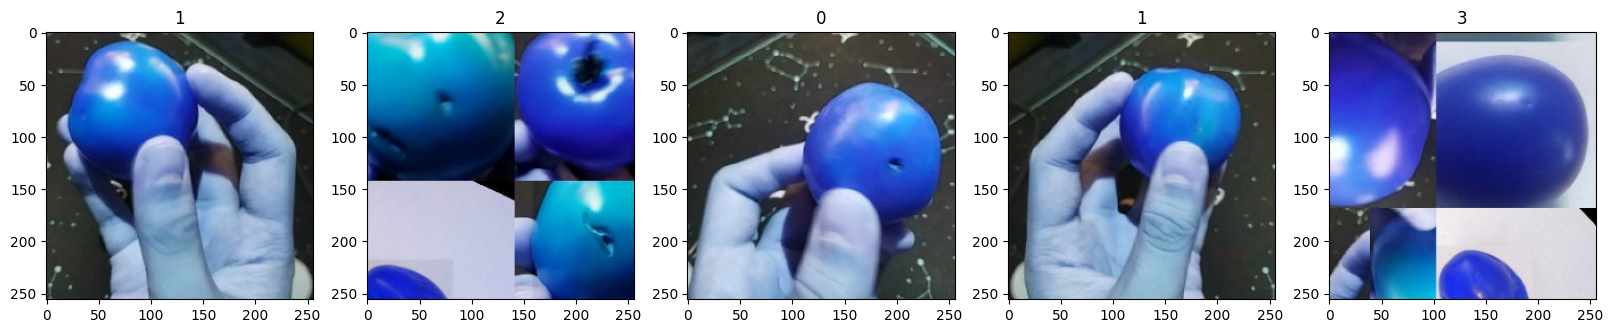

In [ ]:
fig, ax = plt.subplots(ncols=5, figsize=(20, 20))
for idx, img in enumerate(X[:5]):
    imgrgb = ax[idx].imshow(img.reshape(256, 256, 3))
    ax[idx].title.set_text(y[idx])
plt.show()

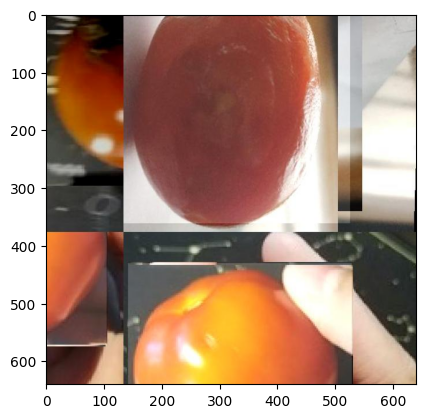

In [ ]:
img = cv2.imread(os.path.join('images_test','0_jpg.rf.0352197d5834dda325387b156ab7366c.jpg'))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

**Building Support Vector Machine Model**

Utilizing the train_test_split function from scikit-learn, we partition our dataset into two subsets:
* Training Set: Comprising 80% of the original dataset, used for training the SVM model.
* Test Set: Consisting of 20% of the dataset, reserved for evaluating the model's performance on unseen data.
This split ensures that the model is trained on a sufficient amount of data while maintaining a separate set for unbiased evaluation.

We initialize a random seed (commonly set to 42) using numpy.random.seed or similar functions. This ensures reproducibility in the random permutation process when shuffling the dataset. The seed value of 42 is arbitrary but widely used for consistency in results across different runs.

We evaluate three distinct SVM models, each employing a different kernel function:
* RBF (Radial Basis Function): Suitable for capturing non-linear relationships between features.
* Polynomial: Useful for datasets where non-linear relationships can be polynomially transformed.
* Linear: Effective when data separation can be achieved by a hyperplane in the feature space.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
rbf_model = svm.SVC(kernel='rbf', gamma=0.5, C=0.1).fit(X_train, y_train)
poly_model = svm.SVC(kernel='poly', degree=3, C=1).fit(X_train, y_train)
linear_model = svm.SVC(kernel='linear', C=1, probability=True).fit(X_train, y_train)

**Model Performance**

In assessing the performance of our SVM models, we predict the classifications for the test dataset using three distinct kernel functions. The predictions are obtained from models trained with RBF, Polynomial, and Linear kernels. These predictions enable us to evaluate how well each SVM model generalizes to unseen data, providing insights into their respective abilities to classify data points based on the learned patterns and decision boundaries. Evaluating the accuracy, precision, and recall metrics of these predictions will further refine our understanding of each model's effectiveness in solving our classification task.

In [ ]:
rbf_prediction = rbf_model.predict(X_test)
poly_prediction = poly_model.predict(X_test)
linear_prediction = linear_model.predict(X_test)

**Model Evaluation**

Higher Accuracy: A higher accuracy score indicates that the model is better at predicting the correct class labels for unseen data points.

Comparison Across Kernels: In this case, the Linear kernel SVM model outperformed both the Polynomial and RBF kernel models in terms of accuracy. However, the choice of the best kernel depends on various factors including the dataset's characteristics, complexity of relationships between features, and the nature of the problem being solved.

Further Analysis: It's beneficial to complement accuracy scores with other evaluation metrics such as precision, recall, and F1-score to gain a more comprehensive understanding of each model's performance and to make informed decisions about model selection and refinement.


In [ ]:
rbf_accuracy = accuracy_score(y_test, rbf_prediction)
poly_accuracy = accuracy_score(y_test, poly_prediction)
linear_accuracy = accuracy_score(y_test, linear_prediction)

In [ ]:
rbf_accuracy, poly_accuracy, linear_accuracy

(0.1875, 0.6125, 0.625)

Here is a quick test where the model classify a very-good tomato in a good tomato.

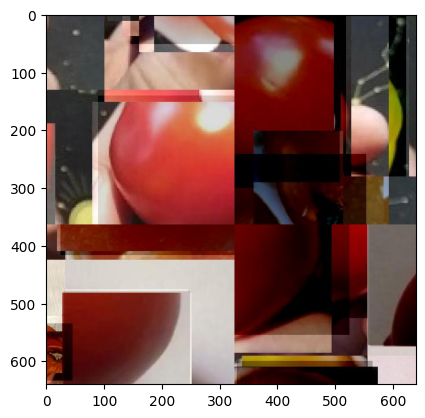

bad = 100.00000000000001%
good = 100.99999984999995%
very-bad = 100.00000010000002%
very-good = 100.00000005000001%
The predicted image is : good


In [ ]:
img = cv2.imread(os.path.join('tomatoes','very-good-126-_jpg.rf.d2df27924d45ef1166ddd0965b23f3a2.jpg'))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()
img_resize = cv2.resize(img, (256, 256))

l = [img_resize.flatten()]
probability = linear_model.predict_proba(l)

Categories = ['bad', 'good', 'very-bad', 'very-good']
for ind, val in enumerate(Categories):
    print(f'{val} = {probability[0][ind]+100}%')
print("The predicted image is : " + Categories[linear_model.predict(l)[0]])